In [1]:
import sys
sys.path.insert(0, '../../gempy/')
import gempy as gp

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gp.__file__

'C:\\Users\\Simon\\Documents\\git\\gempy-tests\\notebooks\\../../gempy\\gempy\\__init__.py'

Generate Model

In [17]:
# Import data
# Create a model instance
geo_model = gp.create_model('combined_model')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(geo_model, [0, 100., 0, 50., 0, 100.], [50, 50, 50],
            path_i = '../data/hierarchical_modeling/hierarchical_model_interfaces.csv',
            path_o = '../data/hierarchical_modeling/hierarchical_model_orientations.csv')
geo_model.set_topography(source='random', d_z=[80,100], fd=1.8)

Active grids: ['regular']
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  1.        ,   0.5       ,   1.        ],
       [  1.        ,   0.5       ,   3.        ],
       [  1.        ,   0.5       ,   5.        ],
       ...,
       [100.        ,  47.95918367,  82.98253482],
       [100.        ,  48.97959184,  82.41877749],
       [100.        ,  50.        ,  83.21476309]])

In [18]:
section_dict = {'section1': ([0, 0], [100, 50], [100, 80]),
                'section2': ([50, 0], [50, 50], [150, 100]),
                'section3': ([0, 25], [100, 25], [200, 150])}  # p1,p2,resolution
geo_model.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
section1,"[0, 0]","[100, 50]","[100, 80]",111.803399
section2,"[50, 0]","[50, 50]","[150, 100]",50.000000
section3,"[0, 25]","[100, 25]","[200, 150]",100.000000


In [19]:
# assign surfaces to series
gp.map_series_to_surfaces(geo_model,
                         {"Fault_series": 'fault',
                         "Lith_series": ('l3_left', 'l2_left', 'l1_left')},
                         remove_unused_series=True)
geo_model.set_is_fault('Fault_series', change_color=False)

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_series,1,Fault,True,True,False
Lith_series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [20]:
# set interpolator
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                      values
range                 150.0
$C_o$            535.714286
drift equations   [3, 3, 3]


In [21]:
sol = gp.compute_model(geo_model)

C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(
C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\core\solution.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.sections = np.array(


C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


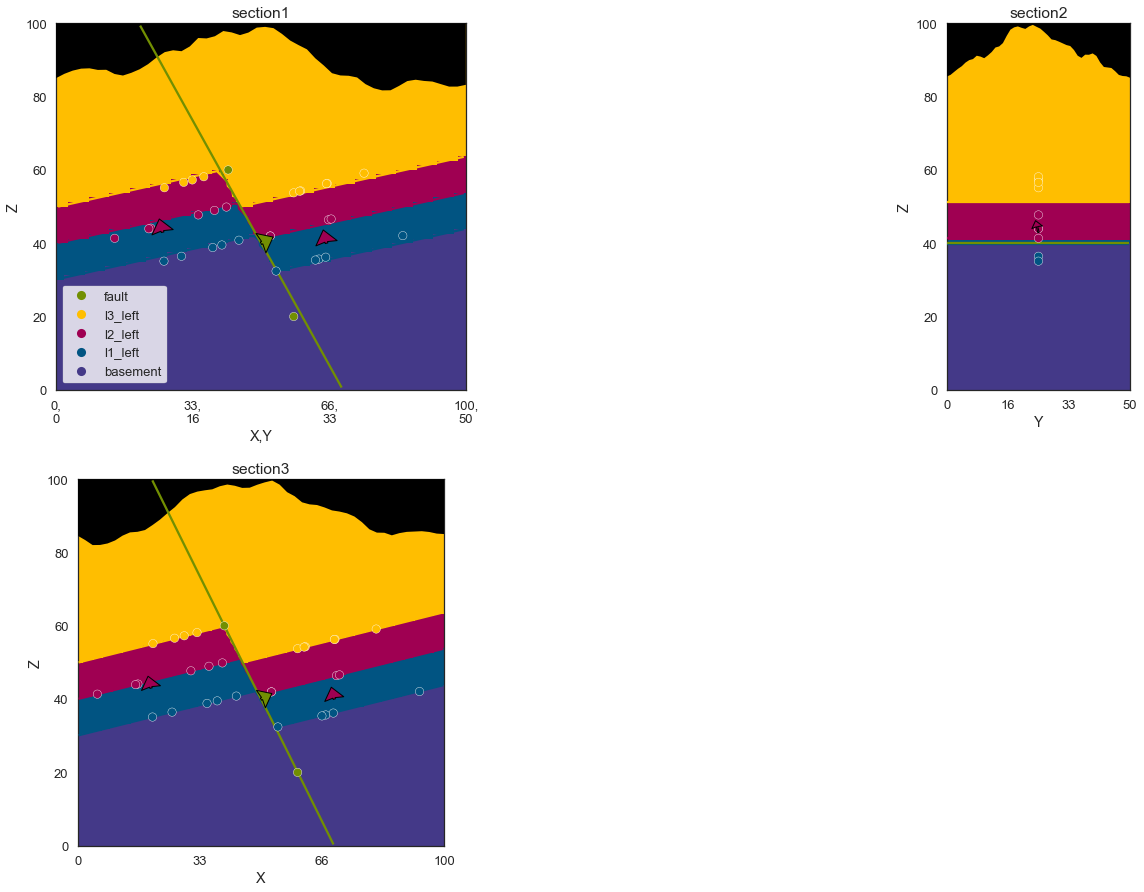

In [23]:
gp.plot_2d(geo_model, section_names=['section1', 'section2', 'section3'], show_topography=True)

C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


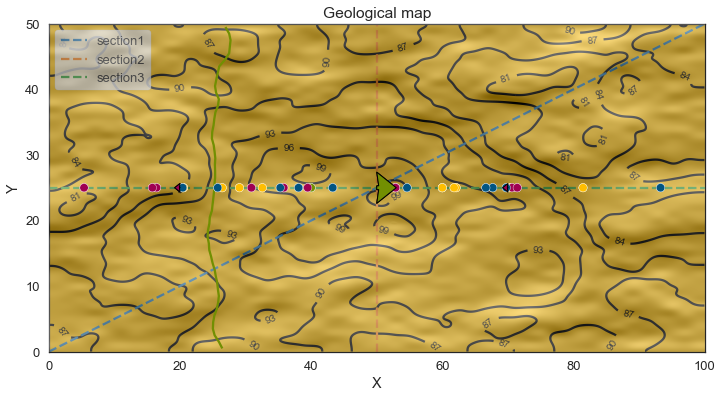

In [30]:
gp.plot_2d(geo_model, section_names='topography', show_topography=True)

In [61]:
geo_model._grid.topography

In [67]:
geo_model._grid.sections.df

,start,stop,resolution,dist
section1,"[0, 0]","[100, 50]","[100, 80]",111.803399
section2,"[50, 0]","[50, 50]","[150, 100]",50.000000
section3,"[0, 25]","[100, 25]","[200, 150]",100.000000


In [76]:
100*80 + 150*100 + 200*150

53000

In [74]:
geo_model._grid.sections.values

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.26582278],
       [  0.        ,   0.        ,   2.53164557],
       ...,
       [100.        ,  25.        ,  98.65771812],
       [100.        ,  25.        ,  99.32885906],
       [100.        ,  25.        , 100.        ]])

In [64]:
geo_model._grid.sections.values.shape

(53000, 3)

In [58]:
geo_model._grid.sections.values.save('test.npy')

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [56]:
if geo_model._grid.sections is not None:
    print("there are sections!")
    geo_model._grid.sections.df.to_csv(f'{pa

there are sections!
